In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from astropy import table
from astropy.table import Table
from astropy.io import ascii
import matplotlib.ticker as ticker
import matplotlib.cm as cm

from scipy import stats

SAGA_DIR = os.environ['SAGA_DIR']


In [5]:
from palettable.colorbrewer.qualitative import Dark2_8
if 'plt' in locals() and hasattr(plt, 'rcParams'):
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['font.size'] = 17.0
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=Dark2_8.mpl_colors)
    plt.rcParams['legend.fontsize'] = 'medium'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 7, 6
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 4

In [6]:
# NAMED HOSTS
complete_hosts =[147100,166313,165536,61945,132339, 149781,33446,150887]
host_ngcs   =['NGC 6181','NGC 5962','NGC 5750','NGC 7716','NGC 1015','PGC 068743','NGC 2543','NGC 7541']

In [7]:
def gri_criteria(base):
    gmag = base['g'] - base['EXTINCTION_G']
    rmag = base['r'] - base['EXTINCTION_R']
    imag = base['i'] - base['EXTINCTION_I']

    gr = gmag - rmag
    ri = rmag - imag

    grerr = np.sqrt(base['g_err']**2 + base['r_err']**2)
    rierr = np.sqrt(base['r_err']**2 + base['i_err']**2)
    
    cgmr = gr - 2.*grerr
    crmi = ri - 2.*rierr

    msk1 = cgmr < 0.85 
    msk2 = crmi < 0.55

    return msk1&msk2

In [8]:

bn = np.arange(16,22,0.25)


/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:87: RuntimeWarning: invalid value encountered in divide


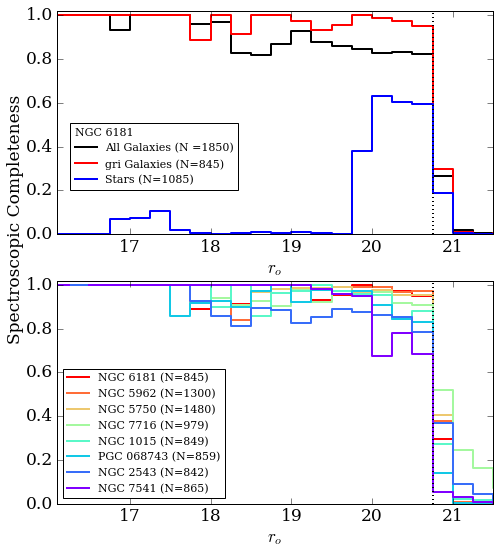

In [9]:
plt.rcParams['figure.figsize'] = 7, 8
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# CREATE ODYESSY PLOT
basefile  = os.path.join(SAGA_DIR, 'base_catalogs', 'base_sql_nsa147100.fits.gz')
base = Table.read(basefile) 


# FIND GOOD OBJECTS IN BASE CATALOG
m_rmv  = base['REMOVE'] == -1
m_rvir = base['RHOST_KPC'] <= 300
m_fib  = base['FIBERMAG_R'] <= 23
base = base[m_rmv & m_rvir & m_fib]

m_gal  = base['PHOT_SG'] == 'GALAXY'
zgood  = base['ZQUALITY'] > 2

#  DEFINE r-MAGNITUDE
r   = base['r'] - base['EXTINCTION_R']
m21 = r < 20.75
gri = gri_criteria(base) 


# ALL GALAXIES
N, x  = np.histogram(r[m_gal], bins=bn)
N2,x2 = np.histogram(r[m_gal&zgood], bins=x)
c_all=1.*N2/N
l_all = 'All Galaxies (N ={:d})'.format(np.sum(m_gal&m21))

# ALL GALAXIES
N, x  = np.histogram(r[m_gal&gri], bins=bn)
N2,x2 = np.histogram(r[m_gal&zgood&gri], bins=x)
c_gri=1.*N2/N
l_gri = 'gri Galaxies (N={:d})'.format(np.sum(m_gal&gri&m21))


# ALL STARS
N, x  = np.histogram(r[~m_gal], bins=bn)
N2,x2 = np.histogram(r[~m_gal&zgood], bins=x)
c_star=1.*N2/N
l_star = 'Stars (N={:d})'.format(np.sum(~m_gal&m21&zgood))


bins = [(bn[i]+bn[i+1])/2. for i in range(len(bn)-1)]
ax1.step(bins,c_all,color='k',where='mid',label=l_all)
ax1.step(bins,c_gri,color='r',where='mid',label=l_gri)
ax1.step(bins,c_star,color='b',where='mid',label=l_star)

ax1.set_ylim(0,1.02)
ax1.set_xlim(16.1,21.5)
#ax1.axhline(1, c='k',ls=':')
ax1.axvline(20.75, c='k',ls=':')
ax1.legend(fontsize=11,frameon=True,numpoints = 1,loc=(0.03,0.2),title='NGC 6181')
ax1.get_legend().get_title().set_fontsize('11')
ax1.get_legend().get_title().set_position((-50, 0))
ax1.set_xlabel('$r_o$')


#########################################################

clr = cm.rainbow(np.linspace(1, 0, len(complete_hosts)))
for host,ngc,c in zip(complete_hosts,host_ngcs,clr):

    
    # READ BASE CATALOG
    basefile  = os.path.join(SAGA_DIR, 'base_catalogs', 'base_sql_nsa{0}.fits.gz'.format(host))
    base = Table.read(basefile) 
    
    # FIND GOOD OBJECTS IN BASE CATALOG
    m_rmv  = base['REMOVE'] == -1
    m_rvir = base['RHOST_KPC'] <= 300
    m_fib  = base['FIBERMAG_R'] <= 23
    base = base[m_rmv & m_rvir & m_fib]

    m_gal  = base['PHOT_SG'] == 'GALAXY'
    zgood  = base['ZQUALITY'] > 2

    #  DEFINE r-MAGNITUDE
    r   = base['r'] - base['EXTINCTION_R']
    m21 = r < 20.75
    gri = gri_criteria(base) 


    # GRI GALAXIES
    N, x  = np.histogram(r[m_gal&gri], bins=bn)
    N2,x2 = np.histogram(r[m_gal&zgood&gri], bins=x)
    c_gri=1.*N2/N
    l = '{} (N={:d})'.format(ngc,np.sum(gri&m21&m_gal))



    bins = [(bn[i]+bn[i+1])/2. for i in range(len(bn)-1)]
    ax2.step(bins,c_gri,where='mid',label=l,color=c)
    
    
ax2.legend(loc=3,fontsize=11,frameon=True,numpoints = 1)

ax2.set_ylim(0,1.02)
ax2.set_xlim(16.1,21.5)
#ax2.axhline(1, c='k',ls=':')
ax2.axvline(20.75, c='k',ls=':')
ax2.set_xlabel('$r_o$')

ax2.text(15.483, 1.3, 'Spectroscopic Completeness', va='center', rotation='vertical')

plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig('fig_completeness.pdf')

In [22]:
# DEFINE RADIAL BINS FOR REFEREE REPORT
bn = np.arange(0,1200,300)
print bn

[  0 300 600 900]


[150.0, 450.0, 750.0]
[ 0.96923077  0.15947712         nan]
[150.0, 450.0, 750.0]
[ 0.97769231  0.30869383         nan]
[150.0, 450.0, 750.0]
[ 0.96824324  0.33671498         nan]
[150.0, 450.0, 750.0]
[ 0.93667007  0.1502947   0.14606742]
[150.0, 450.0, 750.0]
[ 0.9163722   0.09664623  0.05132193]
[150.0, 450.0, 750.0]
[ 0.89639115  0.06161695  0.00555042]
[150.0, 450.0, 750.0]
[ 0.85035629  0.05426696  0.03381643]
[150.0, 450.0, 750.0]
[ 0.81618497  0.01943463  0.00174216]


/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: RuntimeWarning: invalid value encountered in divide


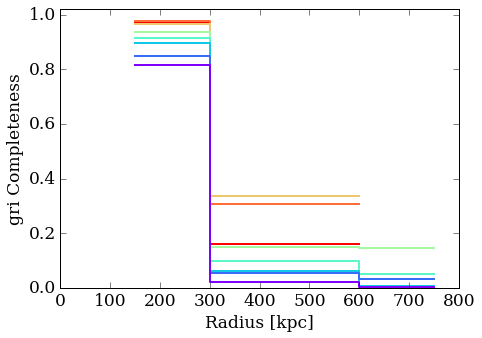

In [24]:
# ****** REDO AS A FUNCTION OF RADIUS
plt.rcParams['figure.figsize'] = 7, 5


clr = cm.rainbow(np.linspace(1, 0, len(complete_hosts)))
for host,ngc,c in zip(complete_hosts,host_ngcs,clr):

    
    # READ BASE CATALOG
    basefile  = os.path.join(SAGA_DIR, 'base_catalogs', 'base_sql_nsa{0}.fits.gz'.format(host))
    base = Table.read(basefile) 
    
    # FIND GOOD OBJECTS IN BASE CATALOG
    m_rmv  = base['REMOVE'] == -1
    m_fib  = base['FIBERMAG_R'] <= 23
    m_gal  = base['PHOT_SG'] == 'GALAXY'
    r   = base['r'] - base['EXTINCTION_R']
    m21 = r < 20.75
    
    base = base[m_rmv & m_fib & m_gal & m21]
    dist = base['RHOST_KPC']
    
    zgood  = base['ZQUALITY'] > 2
    gri = gri_criteria(base) 


    # GRI GALAXIES
    N, x  = np.histogram(dist[gri], bins=bn)
    N2,x2 = np.histogram(dist[zgood&gri], bins=x)
    c_gri=1.*N2/N
#    l = '{} (N={:d})'.format(ngc,np.sum(gri&m_gal))



    bins = [(bn[i]+bn[i+1])/2. for i in range(len(bn)-1)]
    plt.step(bins,c_gri,where='mid',color=c)
    print bins
    print c_gri
    
plt.legend(loc=3,fontsize=11,frameon=True,numpoints = 1)

plt.ylim(0,1.02)
plt.xlim(0,800)

plt.xlabel('Radius [kpc]')
plt.ylabel('gri Completeness')


plt.tight_layout(w_pad=0,h_pad=0)
